<a href="https://colab.research.google.com/github/Paromita2001/NLP_/blob/main/NLP_mahe_7_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem
--
You want to implement word embeddings.

Solution
--
Word embeddings are prediction based, and they use shallow neural networks to train the model that will lead to learning the weight and using them as a vector representation.

<font color='green'>word2vec</font>
--
**word2vec** is the deep learning Google framework to train word embeddings. It will use all the words of the whole corpus and predict
the nearby words. It will create a vector for all the words present in the
corpus in a way so that the context is captured. It also outperforms any
other methodologies in the space of word similarity and word analogies.

 Sentence

I like AI

I love AI

I hate AI

🔸 Step 1: Convert Words into Vectors (Embedding)

Assume embedding size = 3 (for understanding)

Word Vector Representation

like [0.8, 0.6, 0.1]

love [0.82, 0.58, 0.12]

hate [-0.9, -0.7, 0.2]

AI [0.3, 0.1, 0.9]

🔸 Step 2: Observe the Meaning

like and love vectors are very close → similar meaning

hate vector is far away → opposite meaning

Model understands sentiment


❌ No similarity information ❌ like and love look unrelated

🔹 Real-World Example

Search engine:

Search: “good movie”

Embeddings allow matching:

nice movie

excellent film

amazing cinema

Because meanings are close in vector space

### There are mainly 2 types of word2vec Model.

• Skip-Gram

Sentence I love machine learning

Task

➡️ Predict middle word using context

Input (Context) I, love, learning

Output (Target) machine

📌 Use CBOW when

Dataset is large

Faster training

Frequent words



• Continuous Bag of Words (CBOW)

 Example Sentence

I love machine learning

Task

➡️ Predict context words from target

Input (Target) machine

Output (Context) I, love, learning

<img src="https://drive.google.com/uc?id=1ZC7kOYkuY2BGRCONWde38usTOCRJqJlR"/>

The above figure shows the architecture of the CBOW and skip-gram
algorithms used to build word embeddings. Let us see how these models
work in detail.

Skip-Gram
--
The skip-gram model is used to predict the probabilities of a word given the context of word or words.

Let us take a small sentence and understand how it actually works.
Each sentence will generate a target word and context, which are the words
nearby. The number of words to be considered around the target variable
is called the window size. The table below shows all the possible target
and context variables for window size 2. Window size needs to be selected
based on data and the resources at your disposal. The larger the window
size, the higher the computing power.

<img src="https://drive.google.com/uc?id=18nKDL_JAX96Zs_ILGMrcdd517GWLwrW2"/>

Since it takes a lot of text and computing power, let us go ahead and take sample data and build a skip-gram model.

As mentioned *in earlier NB's*, import the text corpus and break it into sentences. Perform **some cleaning and preprocessing** like the removal of
punctuation and digits, and split the sentences into words or tokens, etc.


In [ ]:
#Example sentences
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
[ 'nlp', 'saves', 'time', 'and', 'solves',
'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]

#import library
#!pip install gensim
import gensim
from gensim.models import Word2Vec
from matplotlib import pyplot


In [ ]:
length=[]
for i in sentences:
    print(len(i))
    length.append(len(i))

3
7
3
9
4


In [ ]:
import numpy as np

In [ ]:
np.mean(length)

np.float64(5.2)

In [ ]:
np.median(length)

np.float64(4.0)

In [ ]:
np.min(length)

np.int64(3)

In [ ]:
np.max(length)

np.int64(9)

### training the model
https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
skipgram = Word2Vec(sentences, vector_size =50, window = 3, min_count=1,sg = 1,epochs=5)
# vector_size : int, optional
#     Dimensionality of the word vectors.
# window : int, optional
#     Maximum distance between the current and predicted word within a sentence.
# min_count=1 -> Minimium frequency count of words.
#                The model would ignore words that do not satisfy the min_count.
#                Extremely infrequent words are usually unimportant. (default 5)
# workers -> How many threads to use behind the scenes? (default 3)
# sg -> (default 0 or CBOW) The training algorithm, either CBOW (0)
#                           or skip gram (1).


#     sentences,        # Tokenized text data (list of sentences)
#     vector_size=20,   # Each word is represented using a 20-dimensional vector
#     window=3,         # Context window: 3 words before and after the target word
#     min_count=1,      # Include all words (even rare ones)
#     sg=1,             # Use Skip-Gram model (1 = Skip-Gram, 0 = CBOW)
#     epochs=5          # Train the model for 5 iterations over the dataset

In [ ]:
# distribution
#Word2Vec?  # all data of skip gram present there

In [ ]:
print(skipgram.wv.key_to_index)

{'nlp': 0, 'I': 1, 'learning': 2, 'machine': 3, 'uses': 4, 'problems': 5, 'industry': 6, 'of': 7, 'lot': 8, 'solves': 9, 'and': 10, 'time': 11, 'saves': 12, 'future': 13, 'is': 14, 'months': 15, '2': 16, 'in': 17, 'learn': 18, 'will': 19, 'love': 20}


### access vector for one word

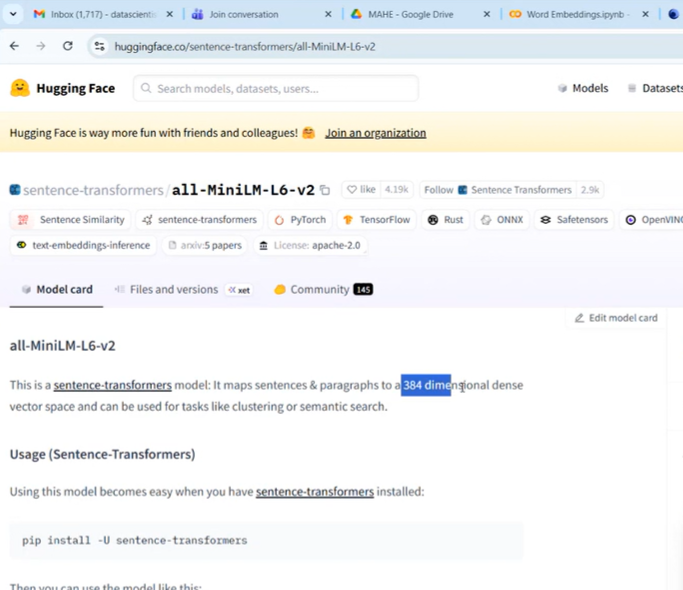

In [ ]:

print(len(skipgram.wv['nlp']))  # get numpy vector of a word

# Since our vector size parameter was 50, the model
# gives a vector of size 50 for each word.

50


In [ ]:
skipgram.wv['nlp']

array([-1.0724545e-03,  4.7286271e-04,  1.0206699e-02,  1.8018546e-02,
       -1.8605899e-02, -1.4233618e-02,  1.2917745e-02,  1.7945977e-02,
       -1.0030856e-02, -7.5267432e-03,  1.4761009e-02, -3.0669428e-03,
       -9.0732267e-03,  1.3108104e-02, -9.7203208e-03, -3.6320353e-03,
        5.7531595e-03,  1.9837476e-03, -1.6570430e-02, -1.8897636e-02,
        1.4623532e-02,  1.0140524e-02,  1.3515387e-02,  1.5257311e-03,
        1.2701781e-02, -6.8107317e-03, -1.8928028e-03,  1.1537147e-02,
       -1.5043275e-02, -7.8722071e-03, -1.5023164e-02, -1.8600845e-03,
        1.9076237e-02, -1.4638334e-02, -4.6675373e-03, -3.8754821e-03,
        1.6154874e-02, -1.1861792e-02,  9.0324880e-05, -9.5074680e-03,
       -1.9207101e-02,  1.0014586e-02, -1.7519170e-02, -8.7836506e-03,
       -7.0199967e-05, -5.9236289e-04, -1.5322480e-02,  1.9229487e-02,
        9.9641159e-03,  1.8466286e-02], dtype=float32)

### Similar to a word

In [ ]:
skipgram.wv.most_similar('solves', topn=2)

[('problems', 0.22543373703956604), ('future', 0.12602588534355164)]

In [ ]:
skipgram = Word2Vec(sentences, vector_size =20, window = 3, min_count=1,sg = 1,epochs=5)

In [ ]:
import sys
!{sys.executable} -m pip install gensim

In [ ]:
#Example sentences
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
[ 'nlp', 'saves', 'time', 'and', 'solves',
'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]

#import library
import gensim
from gensim.models import Word2Vec
from matplotlib import pyplot

In [ ]:
skipgram.wv['nlp']

array([-0.00268114,  0.00118216,  0.02551675,  0.04504637, -0.04651475,
       -0.03558404,  0.03229436,  0.04486494, -0.02507714, -0.01881686,
        0.03690252, -0.00766736, -0.02268307,  0.03277026, -0.0243008 ,
       -0.00908009,  0.0143829 ,  0.00495937, -0.04142607, -0.04724409],
      dtype=float32)

In [ ]:
skipgram.wv.most_similar('solves', topn=2) ### means its good to keep vector size large

[('months', 0.49249207973480225), ('saves', 0.26709887385368347)]

### Saving a model

In [ ]:
skipgram.save("skipgram.model")

### Reloading the model

In [ ]:
model = Word2Vec.load("skipgram.model")
model.wv.most_similar('learn', topn=2)

[('problems', 0.5349024534225464), ('nlp', 0.46582597494125366)]

In [ ]:
model.wv.most_similar('industry', topn=2)

[('in', 0.38166868686676025), ('of', 0.31713858246803284)]

In [ ]:
model.wv.most_similar('machine', topn=2)

[('months', 0.365837424993515), ('and', 0.26138070225715637)]

#### Training an actual corpus

#### TASK


In [ ]:
documents = [
    "Human machine interface, for lab abc& computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees?",
    "Graph minors IV Widths of trees and well. quasi ordering",
    "Graph minors A survey",
]



### Activity

In [ ]:
# cleaning the texts

# remove common words and tokenize

# remove words that appear only once

### Activity- Solution

In [ ]:
from pprint import pprint  # Prints lists/dictionaries in a clean, readable format
from collections import defaultdict  #A dictionary that automatically assigns a default value
                                #Here it will be used to count word frequency
import re

#Get the character set
characters=set()   #Set stores unique values only
for sent in documents:
    for word in sent.split():
        for char in word:
            characters.add(char.lower()) #lower each words {'a', 'b', 'c', 'd', 'e', 'f', ...}

# cleaning the texts

documents_clean=[]

for sent in documents:
#     print(sent)
    sent=re.sub("&","",sent) #remove &
    sent=re.sub(",","",sent)  # remove ,
    sent=re.sub("\?","",sent) #remove ?
    sent=re.sub("\.","",sent) # remove .
#     print(sent)
    documents_clean.append(sent)

# remove common words and tokenize
stoplist = set('for a of the and to in'.split()) #Removing stopwords
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents_clean
] #For each document: -->Convert to lowercase -->Split into words-->Remove stopwords

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

pprint(texts)


[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]


<>:20: SyntaxWarning: invalid escape sequence '\?'
<>:21: SyntaxWarning: invalid escape sequence '\.'
<>:20: SyntaxWarning: invalid escape sequence '\?'
<>:21: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3387274789.py:20: SyntaxWarning: invalid escape sequence '\?'
  sent=re.sub("\?","",sent)
/tmp/ipython-input-3387274789.py:21: SyntaxWarning: invalid escape sequence '\.'
  sent=re.sub("\.","",sent)


In [ ]:
skipgram = Word2Vec(texts, vector_size = 50, window = 3, min_count=1,sg = 1,epochs=9)

In [ ]:
print(skipgram.wv.key_to_index)

{'system': 0, 'graph': 1, 'trees': 2, 'user': 3, 'minors': 4, 'eps': 5, 'time': 6, 'response': 7, 'survey': 8, 'computer': 9, 'interface': 10, 'human': 11}


In [ ]:
vector = skipgram.wv['computer']  # get numpy vector of a word
sims = skipgram.wv.most_similar('computer', topn=10)  # get other similar words
print(sims)
#Try with more number of epochs

[('eps', 0.22442299127578735), ('system', 0.0998455286026001), ('time', 0.089928537607193), ('human', 0.058373644948005676), ('graph', 0.0013571253512054682), ('response', -0.0013637219090014696), ('trees', -0.037274789065122604), ('minors', -0.06371434032917023), ('interface', -0.11219383776187897), ('user', -0.12241575121879578)]


In [ ]:
skipgram.wv['aayush']

KeyError: "Key 'aayush' not present"

**Note** : We get an error saying the word doesn’t exist because this word was not there in our input training data. This is the reason we need to train the algorithm on as much data possible so that we do not miss out on words.


Continuous Bag of Words (CBOW)
--
Now let’s see how to build CBOW model. (Its very similar to SkipGram model)

In [ ]:
#import library
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

#Example sentences
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
[ 'nlp', 'saves', 'time', 'and', 'solves',
'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]

In [ ]:
# training the model
cbow = Word2Vec(sentences, vector_size =128, window = 3, min_count=1,sg = 0)
# size=50 -> means size of vector to represent each token or word
# window=1 -> The maximum distance between the target word and its neighboring word.
# min_count=1 -> Minimium frequency count of words.
#                The model would ignore words that do not satisfy the min_count.
#                Extremely infrequent words are usually unimportant.
# workers -> How many threads to use behind the scenes?
# as sg=0 i.e no skipgram , hence default CBOW

# access vector for one word
print(cbow.wv['nlp'])

[-4.1892752e-04  1.8471200e-04  3.9869919e-03  7.0384946e-03
 -7.2679296e-03 -5.5600069e-03  5.0459942e-03  7.0101470e-03
 -3.9183032e-03 -2.9401341e-03  5.7660192e-03 -1.1980245e-03
 -3.5442291e-03  5.1203528e-03 -3.7970003e-03 -1.4187638e-03
  2.2473279e-03  7.7490136e-04 -6.4728241e-03 -7.3818890e-03
  5.7123173e-03  3.9611422e-03  5.2794479e-03  5.9598871e-04
  4.9616331e-03 -2.6604421e-03 -7.3937606e-04  4.5066979e-03
 -5.8762794e-03 -3.0750809e-03 -5.8684237e-03 -7.2659552e-04
  7.4516553e-03 -5.7180990e-03 -1.8232567e-03 -1.5138602e-03
  6.3104974e-03 -4.6335123e-03  3.5283156e-05 -3.7138546e-03
 -7.5027738e-03  3.9119478e-03 -6.8434263e-03 -3.4311134e-03
 -2.7421862e-05 -2.3139175e-04 -5.9853438e-03  7.5115180e-03
  3.8922327e-03  7.2133932e-03 -6.3733729e-03  3.5123425e-03
 -3.2320907e-03  6.4416882e-04  6.6395467e-03 -3.4860754e-03
  3.5292972e-03 -5.3023128e-03 -2.7722567e-03  7.3425844e-03
 -1.2325412e-03  2.5107153e-04 -3.2348670e-03 -6.0021002e-03
 -1.1781314e-03  1.92952

Important Observation
--
To train these models, it requires a huge amount of computing
power. So, let us go ahead and use Google’s pre-trained model, which has
been trained with over 100 billion words.

Download the model from the below path and keep it in your local
storage:
https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

or **better off from this link** :

https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

Note **if running on Jupyter NB** : The Google Db is soo large that we would get ValueError, like this : ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# import gensim package
import gensim

# load the saved model
model = gensim.models.KeyedVectors.load_word2vec_format('~/Downloads/GoogleNews-vectors-negative300.bin.gz', binary=True)
# model = gensim.models.KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary=True)

FileNotFoundError: [Errno 2] No such file or directory: '/root/Downloads/GoogleNews-vectors-negative300.bin.gz'

In [ ]:
# lets check similarity
print (model.similarity('This', 'is'))

#Lets check one more.
print (model.similarity('post', 'book'))

#print(model.similarity('seed', 'need'))

AttributeError: 'Word2Vec' object has no attribute 'similarity'

“`This`” and “`is`” have a good amount of similarity, but the similarity
between the words “`post`” and “`book`” is poor. For any given set of words, it uses the vectors of both the words and calculates the similarity between them.

In [ ]:
# Finding the odd one out.
model.doesnt_match('breakfast cereal dinner lunch'.split())

AttributeError: 'Word2Vec' object has no attribute 'doesnt_match'

Of '`breakfast`’, ‘`cereal`’, ‘`dinner`’ and ‘`lunch`', only **cereal** is the word that is
not anywhere related to the remaining 3 words.

In [ ]:
# It is also finding the relations between words.
#model.most_similar(positive=['woman', 'king'] , negative=['man'])  # default value of topn is 10

# try this too :
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

AttributeError: 'Word2Vec' object has no attribute 'most_similar'

<img src="https://drive.google.com/uc?id=11Yu1Gj4Rw5BccL6KXnT_rXqYPyJbEUfZ"/>

![Screen%20Shot%202021-04-10%20at%202.37.02%20AM.png](attachment:Screen%20Shot%202021-04-10%20at%202.37.02%20AM.png)

In [ ]:
import gensim.downloader

# Show all available models in gensim-data

print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
# Download the "glove-twitter-25" embeddings

glove_vectors = gensim.downloader.load('glove-twitter-25')

# Use the downloaded vectors as usual:

glove_vectors.most_similar('twitter')


[==================================================] 100.0% 104.8/104.8MB downloaded


[('facebook', 0.948005199432373),
 ('tweet', 0.9403423070907593),
 ('fb', 0.9342358708381653),
 ('instagram', 0.9104824066162109),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885937333106995),
 ('tweets', 0.8878158330917358),
 ('tl', 0.8778461217880249),
 ('link', 0.8778210878372192),
 ('internet', 0.8753897547721863)]

In [ ]:
glove_vectors.most_similar('good')

[('too', 0.9648017287254333),
 ('day', 0.9533665180206299),
 ('well', 0.9503170847892761),
 ('nice', 0.9438973665237427),
 ('better', 0.9425962567329407),
 ('fun', 0.9418926239013672),
 ('much', 0.9413353800773621),
 ('this', 0.9387555122375488),
 ('hope', 0.9383506774902344),
 ('great', 0.9378516674041748)]

In [ ]:
glove_vectors.most_similar('easy')

[('enough', 0.944820761680603),
 ('work', 0.9400238990783691),
 ('find', 0.9284411668777466),
 ('more', 0.9275131225585938),
 ('need', 0.92738276720047),
 ('learn', 0.9269551038742065),
 ('anything', 0.9238365292549133),
 ('better', 0.9229285717010498),
 ('something', 0.9228536486625671),
 ('rather', 0.9212591052055359)]

Implementing <font color='green'>fastText</font>
--
**fastText** is another deep learning framework developed by Facebook to capture context and meaning.

Problem
--
How to implement fastText in Python.

Solution
--
fastText is the improvised version of word2vec. word2vec basically
considers words to build the representation. But fastText takes each
character while computing the representation of the word.

In [ ]:
# Let us see how to build a fastText word embedding.
# Import FastText
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

#Example sentences
sentences = [['I', 'love', 'nlp'],
['I', 'will', 'learn', 'nlp', 'in', '2','months'],
['nlp', 'is', 'future'],
[ 'nlp', 'saves', 'time', 'and', 'solves',
'lot', 'of', 'industry', 'problems'],
['nlp', 'uses', 'machine', 'learning']]

fast = FastText(sentences,window=1,  vector_size= 10, min_count=1, workers=5, min_n=1, max_n=2)
# size=10 -> means size of vector to represent each token or word
# window=1 -> The maximum distance between the target word and its neighboring word.
# min_count=1 -> Minimium frequency count of words.
#                The model would ignore words that do not satisfy the min_count.
#                Extremely infrequent words are usually unimportant.
# workers -> How many threads to use behind the scenes?
# min_n=1, max_n=2  -> When finding similarity or analogies like this :
# "Father" - "Boy" + "Girl" == "Mother"
#print(fast.most_similar(['girl', 'father'], ['boy'], topn=3))
# [('mother', 0.7996115684509277), ('grandfather', 0.7629683613777161),
# ('wife', 0.7478234767913818)]
# we want the model to show min 1 and max 2 analogies


# vector for word nlp
print(fast.wv['nlp'])


[-3.0992376e-02  2.1436776e-03  1.5688285e-02  2.4421552e-02
 -1.4157525e-02 -3.9595063e-05  1.9902313e-02 -1.2320179e-02
 -4.2467467e-03  1.7156215e-02]


In [ ]:
# Try this
print(fast.wv.most_similar(['machine', 'learning'], ['nlp'], topn=3))

[('I', 0.4521641135215759), ('in', 0.318511426448822), ('uses', 0.2360837608575821)]



<hr>
<br><br>
<u><b>Further Resources</b></u> :

https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

https://datascience.stackexchange.com/questions/22250/what-is-the-difference-between-a-hashing-vectorizer

In [ ]:
100 tokens

2  vector size
[0.1,0.5]
0.05,0.25

(0.05, 0.25)

#webinar 7

In [29]:
df = pd.read_csv("spam.csv", encoding="iso-8859-1")[["v1", "v2"]]
df.columns = ["label", "text"]
df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
import pandas as pd
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter


In [21]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [33]:
def clean_text(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs & emails
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\S+@\S+", "", text)

    # 3. Remove numbers
    text = re.sub(r"\d+", "", text)

    # 4. Remove special characters & punctuation
    text = re.sub(r"[^a-z\s]", "", text)

    # 5. Tokenization
    words = text.split()

    # 6. Remove stopwords & short words + lemmatization
    cleaned_words = [
        lemmatizer.lemmatize(word)
        for word in words
        if word not in stop_words and len(word) > 2
    ]

    # 7. Join words back
    return " ".join(cleaned_words)


In [34]:
df["text_new"] = df["text"].apply(clean_text)
df.head()


,label,text,text_new
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [36]:
df['text_new']

,text_new
0,jurong point crazy available bugis great world...
1,lar joking wif oni
2,free entry wkly comp win cup final tkts may te...
3,dun say early hor already say
4,nah dont think go usf life around though
...,...
5567,time tried contact pound prize claim easy call...
5568,going esplanade home
5569,pity mood soany suggestion
5570,guy bitching acted like interested buying some...


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #0

🔹 What is pad_sequences?

Padding = adding zeros (0) to sequences so that all sentences have the same length.

👉 pad_sequences() is a function that:

Takes sentences converted to numbers

Makes all of them equal length

🔹 Problem without padding (WHY it is needed)

Imagine you have 3 sentences after tokenization:

"I love ML"          → [5, 9, 2]

"Deep learning"      → [7, 4]

"NLP is very cool"   → [6, 3, 8, 10]


Lengths:

3, 2, 4


⚠️ Neural Networks (RNN, LSTM, GRU)
❌ cannot handle variable-length inputs in batches

They need fixed-size input tensors.

🔹 Solution → Padding

We decide a maximum length, say maxlen = 5.

After padding:

[5, 9, 2]        → [5, 9, 2, 0, 0]

[7, 4]           → [7, 4, 0, 0, 0]

[6, 3, 8, 10]    → [6, 3, 8, 10, 0]



✅ Now all sentences have length = 5

In [37]:
tokenizer = Tokenizer(oov_token="<oov>")
tokenizer.fit_on_texts(df["text_new"])

Creates a word dictionary

Each unique word gets a number ID

oov_token="<oov>" handles unknown words later

whatever model have not ssen concider oov index 1

In [38]:
tokenizer.word_index

{'<oov>': 1,
 'call': 2,
 'get': 3,
 'dont': 4,
 'free': 5,
 'ltgt': 6,
 'know': 7,
 'day': 8,
 'come': 9,
 'like': 10,
 'ill': 11,
 'got': 12,
 'good': 13,
 'time': 14,
 'text': 15,
 'want': 16,
 'love': 17,
 'send': 18,
 'need': 19,
 'one': 20,
 'going': 21,
 'today': 22,
 'txt': 23,
 'home': 24,
 'lor': 25,
 'see': 26,
 'sorry': 27,
 'stop': 28,
 'still': 29,
 'back': 30,
 'mobile': 31,
 'think': 32,
 'reply': 33,
 'take': 34,
 'tell': 35,
 'phone': 36,
 'new': 37,
 'week': 38,
 'well': 39,
 'later': 40,
 'please': 41,
 'cant': 42,
 'make': 43,
 'say': 44,
 'night': 45,
 'claim': 46,
 'thing': 47,
 'much': 48,
 'dear': 49,
 'great': 50,
 'hey': 51,
 'pls': 52,
 'number': 53,
 'happy': 54,
 'friend': 55,
 'work': 56,
 'give': 57,
 'hope': 58,
 'message': 59,
 'thats': 60,
 'way': 61,
 'wat': 62,
 'msg': 63,
 'prize': 64,
 'right': 65,
 'yes': 66,
 'let': 67,
 'min': 68,
 'already': 69,
 'tomorrow': 70,
 'ask': 71,
 'really': 72,
 'yeah': 73,
 'said': 74,
 'babe': 75,
 'didnt': 76,
 '

In [39]:
len(tokenizer.word_index)

7587

In [41]:
tokenizer.texts_to_sequences(["I love odisha"])

[[1, 17, 1]]

In [42]:
seq = tokenizer.texts_to_sequences(df["text_new"])

In [43]:
print(seq)

[[3439, 245, 539, 513, 1001, 50, 225, 2335, 1002, 12, 3440, 62], [209, 1133, 319, 1488], [5, 333, 572, 703, 83, 825, 465, 1489, 167, 15, 210, 333, 2336, 23, 2337, 254, 2338], [135, 44, 246, 2339, 69, 44], [754, 4, 32, 334, 704, 78, 112, 335], [649, 51, 1003, 38, 132, 30, 10, 255, 29, 247, 826, 3441, 18, 1490], [113, 405, 10, 248, 487, 10, 2340, 3442], [122, 705, 1134, 1134, 1491, 1780, 1781, 1782, 426, 755, 466, 599, 756, 55, 755], [514, 600, 269, 117, 294, 2341, 64, 757, 46, 2, 46, 283, 376, 144], [31, 155, 903, 365, 204, 377, 31, 226, 5, 2, 31, 365, 5], [126, 24, 123, 4, 16, 164, 177, 904, 114, 86, 3443, 295, 22], [1492, 198, 83, 90, 310, 23, 2342, 18, 211, 2343, 8, 2344, 254, 33, 488], [106, 38, 5, 1783, 64, 2345, 23, 132, 46, 2346, 284, 2347], [86, 1297, 65, 132, 311, 3444, 650, 137, 34, 118, 3445, 3446, 650, 540, 1298, 14], [394, 905], [3447, 178, 378, 1004, 758, 706, 109, 23, 59, 1004, 3448], [3449, 239], [270, 1784, 138, 66, 1005, 43, 1299], [171, 60, 61, 92, 60, 61, 3450], [759

In [44]:
for i in seq[:5]:
    print(len(i))  #first row 12 tokens, 2nd row 4 tokens....

12
4
17
6
8


In [45]:
max_len = max([len(i) for i in seq])
max_len

80

In [47]:
x = pad_sequences(seq, maxlen=80, padding="pre")
x[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 3439,  245,  539,  513, 1001,   50,  225, 2335, 1002,
         12, 3440,   62], dtype=int32)

In [48]:
x = pad_sequences(seq, maxlen=80, padding="post")
x[0]

array([3439,  245,  539,  513, 1001,   50,  225, 2335, 1002,   12, 3440,
         62,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

In [49]:
y = df["label"].values

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

🔹 Model Building Options

* Sequential API
→ Simple, linear stack of layers
→ Use for basic models (one input, one output)

* Functional API ⭐ (most used in industry)
→ Flexible, graph-based
→ Use for multiple inputs/outputs, complex NLP models

* Subclassing API
→ Full control with custom logic
→ Use for research, GANs, RL (advanced)

🔹 Common Layers (NLP Focus)

* Embedding → Converts word IDs to vectors (mandatory for NLP)

* SimpleRNN → Basic sequence learning (mostly educational)

* LSTM ⭐ → Handles long text dependencies (best choice)

* GRU → Faster, fewer parameters than LSTM

* Bidirectional → Reads text forward & backward (better accuracy)

* Dense → Final classification layer

* Dropout → Prevents overfitting

* Masking (mask_zero=True) → Ignores padded zeros

🔹 Recommended for Spam Classification

Beginner / Exam:
Embedding → LSTM → Dense (Sequential)

Real-world / Resume:
Embedding → Bidirectional LSTM → Dropout → Dense (Functional)

In [15]:
import numpy as np
a1 = np.array([[1,2,3],
          [4,5,6]])

In [16]:
a1

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
out = Embedding(input_dim=7, output_dim=20, input_length=2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


input_dim = number of unique words in entire data set

output_dim = meaning size per word. vector size decided by each embbeding vector

input_length= length of each input sequence

In [18]:
final_out = out(a1)

In [19]:
final_out[1,2]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-0.0473004 ,  0.01852742,  0.00299966, -0.03275777,  0.03860357,
        0.04156068, -0.02600129,  0.03304723, -0.03999241, -0.00392042,
        0.02172313,  0.00121327,  0.04264503, -0.00267852,  0.03256192,
        0.02991097,  0.02735294, -0.01560881,  0.01025728,  0.02012106],
      dtype=float32)>